## Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [4]:
df = pd.read_excel('ENB2012_data.xlsx')

In [5]:
print(df.shape)

(768, 10)


In [6]:
print(df.columns)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')


In [7]:
df.columns = [
    "Relative Compactness",
    "Surface Area",
    "Wall Area",
    "Roof Area",
    "Overall Height",
    "Orientation",
    "Glazing Area",
    "Glazing Area Distribution",
    "Heating Load",
    "Cooling Load"
]

In [8]:
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [10]:
X = df.iloc[:, 0:8]
y = df["Heating Load"]

# Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Splitting the dataset

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the SVR model on the dataset

In [13]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)

SVR()

# Making prediction

In [14]:
y_pred = regressor.predict(X_test)

# Evaluate performance

In [15]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))

R² Score: 0.9234670726439442
MSE: 7.977211407713353
RMSE: 2.824395759753465
MAE: 1.8888188466114542


# Making single prediction

In [33]:
# Original input features
features = {
    "Relative Compactness": 0.98,
    "Surface Area": 514.5,
    "Wall Area": 294.0,
    "Roof Area": 110.25,
    "Overall Height": 7.0,
    "Orientation": 2,
    "Glazing Area": 0.0,
    "Glazing Area Distribution": 0
}

# Convert features into the right shape (2D array)
input_data = np.array(list(features.values())).reshape(1, -1)

# Make prediction with trained SVR model
prediction = regressor.predict(input_data)

# Show results
print("Input Building Features:", features)
print("Predicted Heating Load:", round(prediction[0], 2))


Input Building Features: {'Relative Compactness': 0.98, 'Surface Area': 514.5, 'Wall Area': 294.0, 'Roof Area': 110.25, 'Overall Height': 7.0, 'Orientation': 2, 'Glazing Area': 0.0, 'Glazing Area Distribution': 0}
Predicted Heating Load: 20.74


# Actual vs Predicted

In [35]:
# Example: take the first row from test
i = 0
actual = y_test.iloc[i]
pred = regressor.predict([X_test[i]])

print(f"Actual Heating Load: {actual}")
print(f"Predicted Heating Load: {pred[0]:.2f}")


Actual Heating Load: 16.47
Predicted Heating Load: 17.09


# Visualizing the SVR Results

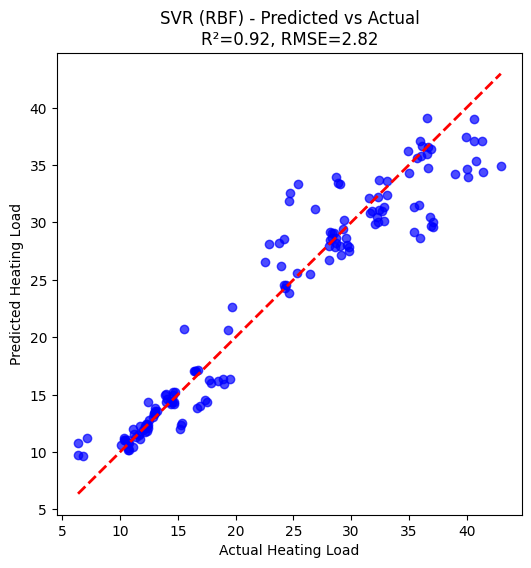

In [19]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--", lw=2)

plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title(f"SVR (RBF) - Predicted vs Actual\nR²={r2_score(y_test, y_pred):.2f}, RMSE={np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
plt.show()